## improving sensor readout

I want to get more consistent readout from the sensor, so I will implement a check on how much the data drifted or if there are outliers.


### CV calclation

In [1]:
## loading the pacakges
from read_sensor import read_data
from datetime import datetime as dt
import sys
import pickle
import os
import numpy
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


/home/pi/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# loading previous data
db_name = "data.pickle"
if os.path.exists( db_name ):
    print("loading previous data")
    with open( db_name , "rb" ) as f:
        data_stored = pickle.load( f )


loading previous data


In [3]:
data_stored.keys()

dict_keys(['20250614_180011_test', '20250629_171525_water_tap', '20250629_171525_water_sm', '20250629_171525_apple', '20250629_171525_milk', '20250629_171525_coffee'])

In [15]:
# testing on a random measurement

df = data_stored[ '20250629_171525_water_tap' ]
df = pd.DataFrame( df )
df[0]

0     413
1     413
2     413
3     413
4     413
5     413
6     413
7     413
8     413
9     413
10    413
11    413
12    413
13    413
14    413
15    413
16    413
17    413
18    413
19    413
20    413
21    413
22    413
23    413
24    413
25    413
26    413
27    413
28    413
29    413
30    413
31    413
32    413
33    413
34    413
35    413
36    413
37    413
38    413
39    413
40    413
41    413
42    413
43    413
44    413
45    413
46    413
47    413
48    413
49    413
Name: 0, dtype: int64

## Test Data to Plot

In [8]:
# Perform PCA on the transposed DataFrame
# For demonstration, we'll reduce to 2 components for plotting
pca = PCA(n_components=2)

In [ ]:
pca.

In [12]:
df = data_stored[ '20250629_171525_apple' ]
df = pd.DataFrame( df )
df.head()

,0,1,2
0,386,790,791
1,397,793,802
2,394,789,777
3,386,789,792
4,398,793,803


In [13]:
def z_score_scale(series):
    if  series.min() == series.max() :
        return( 0 )
    else:
        return (100* series.std() / series.mean()  )

# Apply min-max scaling to each column
df_scaled = df.apply(z_score_scale)

df_scaled

0    1.859074
1    0.415192
2    1.353832
dtype: float64

In [6]:
# apply this for all measurements
for key, data_ in data_stored.items():
    df = pd.DataFrame( data_ )
    df_scaled = df.apply(z_score_scale)
    print(key )
    print(df_scaled )
    if any(df_scaled >2.5 ):
        print(" -> large CV detected...")

    print("--")





20250614_180011_test
0    0.000000
1    0.085538
2    0.070629
dtype: float64
--
20250629_171525_water_tap
0    0.000000
1    0.083298
2    0.075519
dtype: float64
--
20250629_171525_water_sm
0    0.129926
1    2.886581
2    3.311083
dtype: float64
 -> large CV detected...
--
20250629_171525_apple
0    1.859074
1    0.415192
2    1.353832
dtype: float64
--
20250629_171525_milk
0    1.004695
1    0.855259
2    0.893863
dtype: float64
--
20250629_171525_coffee
0    1.867748
1    0.189665
2    1.432271
dtype: float64
--


True

### plotting outliers

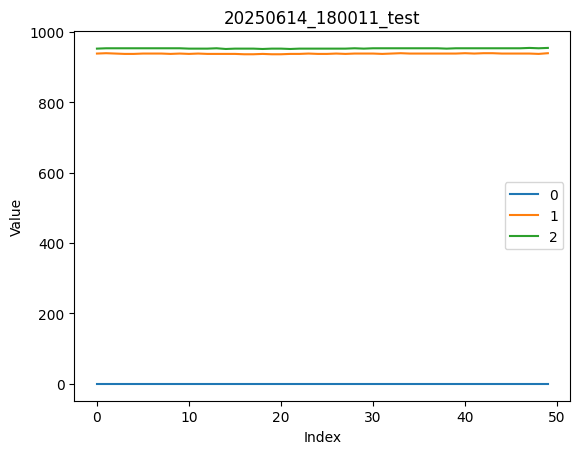

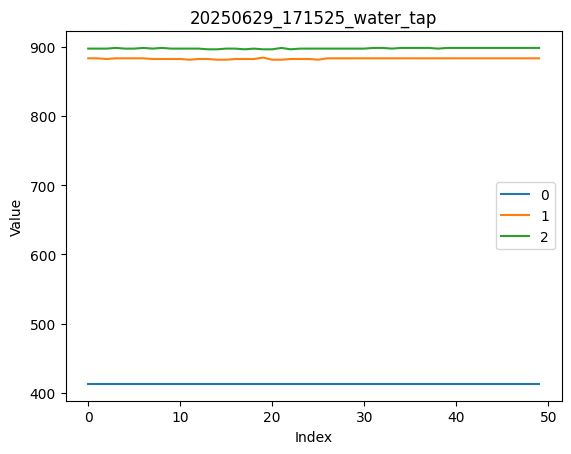

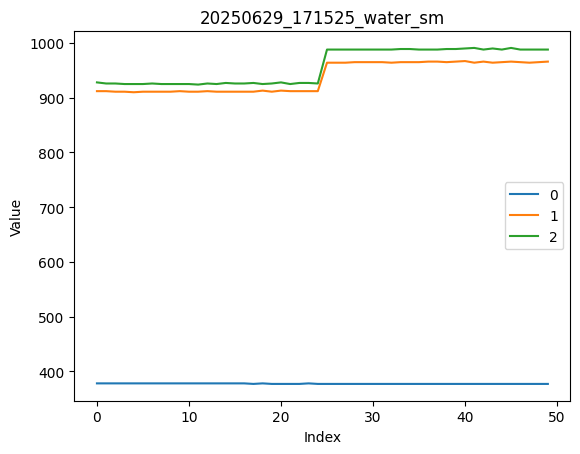

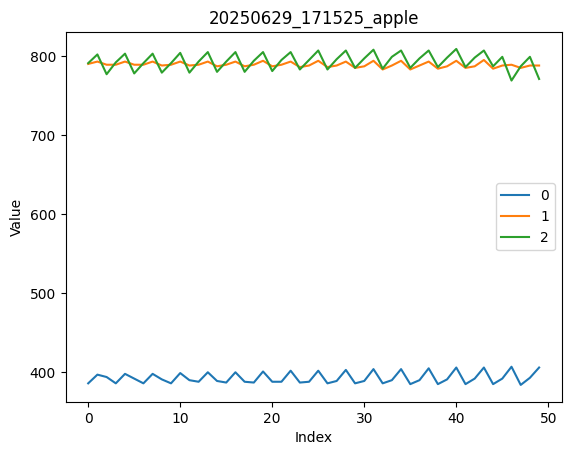

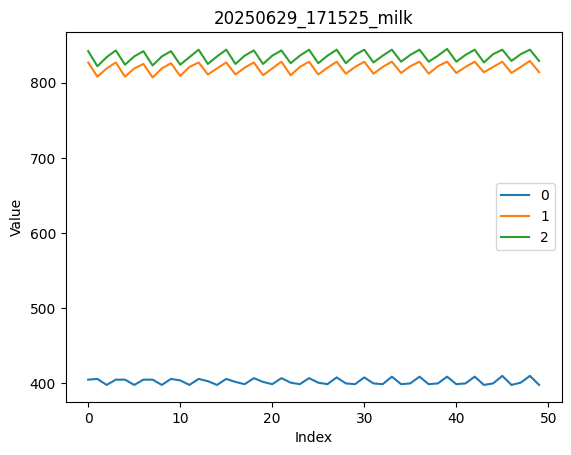

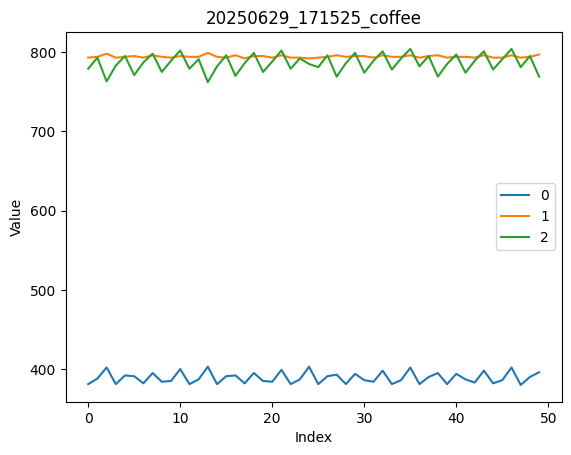

In [7]:

for key, data_ in data_stored.items():
    for label, values in data_.items():
        plt.plot(values, label=label)
    plt.title(f'{key}') # Add a title
    plt.xlabel('Index')                 # Add x-axis label
    plt.ylabel('Value')                 # Add y-axis label
    plt.legend()                        # Show labels in a legend
    plt.show()    
